In [34]:
import pandas as pd
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import numpy as np
df = pd.read_csv('lung_cancer.csv')
df.dropna(axis='columns')
df.drop_duplicates()
print (df.shape)
print (df.dtypes)





(309, 16)
GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


1.The problem in the dataset I chose is lung cancer and I am trying to see what columns have a relation with my target. The target variable is lung cancer and my prediction goal is that I want to see what features is a cause od lung cancer.

In [35]:
df.value_counts(dropna=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
2. I removed duplicates and dropped the unwanted features. Smoking, Chronic Disease, and Shortnes of breath are the features that I have to drop.

In [36]:
df.replace(1, 0, inplace=True)
df.replace(2, 1, inplace=True)
df.replace('NO',0, inplace=True)
df.replace('YES',1, inplace = True)

In [37]:
print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        0               1        1              0   
1      M   74        1               0        0              0   
2      F   59        0               0        0              1   
3      M   63        1               1        1              0   
4      F   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         1         0         1                  1         1   
1                1         1         1         0                  0         0   
2                0         1         0         1                  0         1   
3                0         0         0         0                  1         0   
4                0         0         0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    1                     

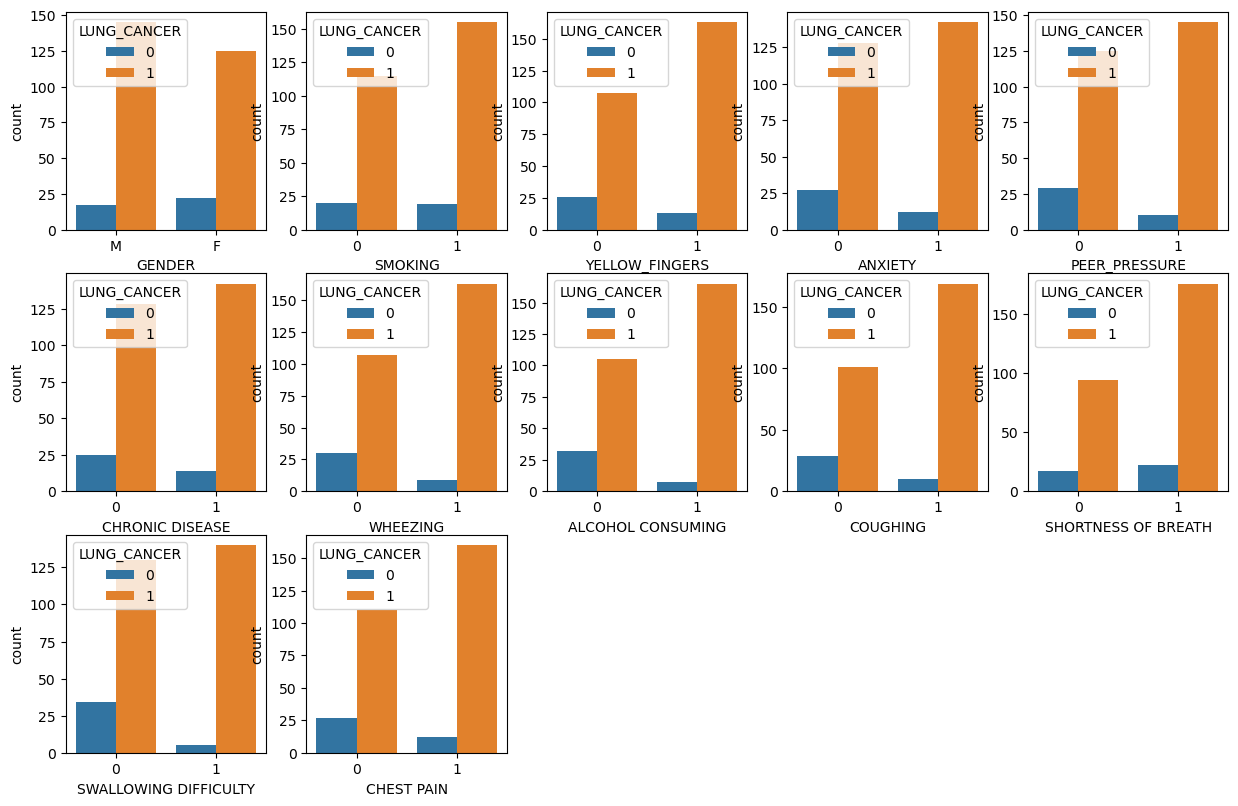

In [38]:
df_list=['GENDER','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN']
fig = plt.figure(figsize=(15,30))
for i in range(len(df_list)):
    column=df_list[i]
    sub=fig.add_subplot(9,5,i+1)
    chart = sns.countplot(x=column,hue='LUNG_CANCER',data=df)


,SMOKING,YELLOW_FINGERS,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,LUNG_CANCER
0,0,1,1,0,1,1,1,1,1
1,1,0,1,1,0,0,0,1,1
2,0,0,1,0,1,0,1,1,0
3,1,1,0,0,0,1,0,0,0
4,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
304,0,0,1,0,0,1,1,1,1
305,1,0,1,1,1,1,1,1,1
306,1,0,0,1,1,1,1,0,1
307,1,0,1,1,0,1,1,1,1


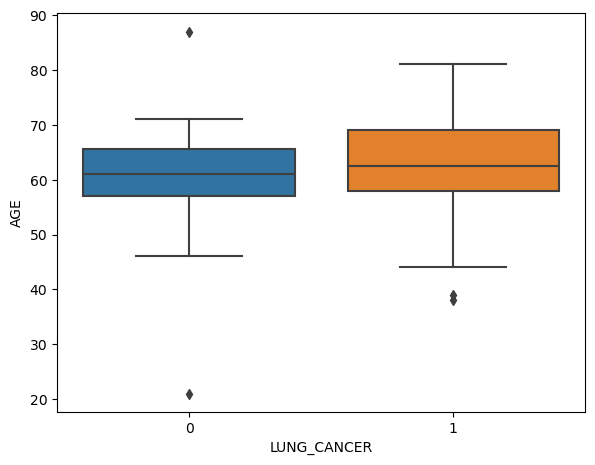

In [49]:
num_list=['AGE']
fig=plt.figure(figsize=(15, 30))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(5,2,i+1)
    sns.boxplot(x='LUNG_CANCER',y=column, data=df)
df.drop(columns = ['AGE','GENDER','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','CHEST PAIN','SWALLOWING DIFFICULTY','SMOKING'])

3.
Yes I dropped smoking,chronic disease, and shortness of breath. I used the chi-squared test and smoking, chronic disease, shortness of breath has the little varience. Gender, smoking,Anxiety, peer pressure, chronic disease and age irrevalent features.  I also had to change the peer pressure answers from yes and no to 0 and 1.

In [48]:
x = df.loc[:, ['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN']]
y = df.loc[:,'LUNG_CANCER']

fs = SelectKBest(score_func=chi2, k='all')  # call the method
bestFeatures = fs.fit(x, y)    # train the model
np.set_printoptions(suppress = True)
print(bestFeatures.scores_)    # print out the scores 
print(bestFeatures.pvalues_)

[ 0.45694567  4.37354798  3.25649906  5.35001379  1.88141574  8.51461439
 11.40541145  8.03232106  0.40949668 11.06336575  4.96919102]
[0.49905489 0.03650092 0.07114086 0.02072211 0.17017333 0.00352306
 0.0007323  0.00459499 0.52222508 0.0008805  0.02580271]


4.No the dataset is balanced I used the train test split to validate the result. I used the pvalues and features. The accuracy score is high. Its a 94 witch mean that I have a good model and it passed.

In [41]:
x = df.iloc[:,1:-1]
y = df['LUNG_CANCER']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)  

In [42]:
print(x_train)
print(y_train)

     AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
281   55        1               0        0              0                0   
147   56        0               0        0              1                1   
288   61        0               1        1              1                0   
89    55        1               0        0              1                1   
292   69        0               0        1              0                0   
..   ...      ...             ...      ...            ...              ...   
177   64        1               0        0              0                0   
269   55        0               0        0              0                1   
184   72        1               0        0              0                0   
6     52        1               0        0              0                0   
104   72        1               1        1              1                0   

     FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING 

In [43]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)  # call the method.
oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)

print(x_train.shape)
print(oversampled_x.shape)


(216, 14)
(378, 14)


In [44]:
LogRegression = LogisticRegression(penalty='none', max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())
test_pred = LogRegression.predict(x_test)
accuracy_score(y_test, test_pred)



C:\Users\laqui\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


0.9354838709677419

In [50]:
print (df.corr())

                            AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
AGE                    1.000000 -0.084475        0.005205  0.053170   
SMOKING               -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS         0.005205 -0.014585        1.000000  0.565829   
ANXIETY                0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE          0.018685 -0.042822        0.323083  0.216841   
CHRONIC DISEASE       -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE                0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY                0.027990  0.001913       -0.144300 -0.165750   
WHEEZING               0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL CONSUMING      0.058985 -0.050623       -0.289025 -0.165750   
COUGHING               0.169950 -0.129471       -0.012640 -0.225644   
SHORTNESS OF BREATH   -0.017513  0.061264       -0.105944 -0.144077   
SWALLOWING DIFFICULTY -0.001270  0.030718        0.345904  0.489403   
CHEST 

C:\Users\laqui\AppData\Local\Temp\ipykernel_12104\1494722421.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print (df.corr())
